In [1]:
from PIL import Image, ImageOps
from sklearn.decomposition import PCA
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def img_data(imgPath,disp = True):
    
    orig_img = Image.open(imgPath)
    
    img_size_kb = os.stat(imgPath).st_size/1024
    
    ori_pixels = np.array(orig_img.getdata()).reshape(*orig_img.size, -1)
    
    img_dim = ori_pixels.shape 
    
    if disp:
        plt.imshow(orig_img)
        plt.show()
    
    data_dict = {}
    data_dict['img_size_kb'] = img_size_kb
    data_dict['img_dim'] = img_dim
    
    return data_dict

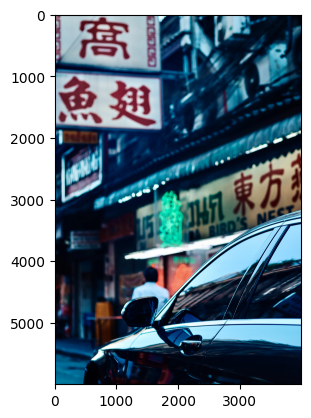

Original Image Data
Original Image size (kB) 2551.0732421875
Original Image Shape (4000, 6000, 3)


In [3]:

imgPath = 'image.jpg'

data_dict_ori = img_data(imgPath)

print('Original Image Data')
print('Original Image size (kB)',data_dict_ori['img_size_kb'])
print('Original Image Shape',data_dict_ori['img_dim'])

In [4]:
def pca_compose(imgPath):
    
    orig_img = Image.open(imgPath)
    # 1. Read the image
    orig_img = Image.open(imgPath)
    
    # 2. Convert the reading into a 2D numpy array
    img = np.array(orig_img.getdata())
    
    # 3. Reshape 2D to 3D array 
    # The asterisk (*) operator helps in unpacking the sequence/collection as positional arguments. 
    # So, instead of using indices of elements separately, we can use * and perform action on it.
    # print(orig_img.size) = (1024, 1024) --> print(*orig_img.size) = 1024 1024
    img = img.reshape(*orig_img.size, -1)
    
    # Seperate channels from image and use PCA on each channel
    pca_channel = {}
    img_t = np.transpose(img) # transposing the image 
    
    for i in range(img.shape[-1]):    # For each RGB channel compute the PCA
        
        per_channel = img_t[i] # It will be in a shape (1,1024,1024)
        
        # Converting (1, 1024, 1024) to (1024, 1024)
        channel = img_t[i].reshape(*img.shape[:-1])  # obtain channel
        
        pca = PCA(random_state = 42)                #initialize PCA
        
        fit_pca = pca.fit_transform(channel)        #fit PCA
        
        pca_channel[i] = (pca,fit_pca)  #save PCA models for each channel
        
    return pca_channel

In [5]:
def explained_var_n(pca_channel, n_components):
    
    var_exp_channel = []
    var_exp=0
    
    for channel in pca_channel:
        
        pca,_ = pca_channel[channel]
        
        var_exp_channel.append(np.cumsum(pca.explained_variance_ratio_))
        
        var_exp += var_exp_channel[channel][n_components]
        
    var_exp = var_exp/len(pca_channel)
    
    return var_exp